In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt
import seaborn as sns

### Reading, initial pre-processing and analysis

In [2]:
df = pd.read_csv("PRSA_Data_Dingling_20130301-20170228.csv", encoding = 'ISO-8859-1')

In [8]:
# Takes a string and returns a datetime object. This datetime object is used as index later.

def dateparser(x):
    return datetime.strptime(x,"%Y %m %d %H")

In [10]:
# Read the date and convert into a concatenated date time object. Adds a new column with the date object created by concatenating the individual date aspects.

df = pd.read_csv("PRSA_Data_Dingling_20130301-20170228.csv", encoding = 'ISO-8859-1',parse_dates = [['year','month','day','hour']], date_parser = dateparser, keep_date_col = True )

In [5]:
# Initial analysis of the data
display(df.describe())
display(df.info())

# display(df)

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,34285.000000,34408.000000,34334.000000,33830.000000,33052.000000,33850.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,65.989497,83.739723,11.749650,27.585467,904.896073,68.548371,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,72.267723,79.541685,15.519259,26.383882,903.306220,53.764424,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,3.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,14.000000,26.000000,2.000000,9.000000,300.000000,31.000000,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,41.000000,60.000000,5.000000,19.000000,600.000000,61.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,93.000000,117.000000,15.000000,38.000000,1200.000000,90.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,881.000000,905.000000,156.000000,205.000000,10000.000000,500.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   year_month_day_hour  35064 non-null  datetime64[ns]
 1   No                   35064 non-null  int64         
 2   year                 35064 non-null  object        
 3   month                35064 non-null  object        
 4   day                  35064 non-null  object        
 5   hour                 35064 non-null  object        
 6   PM2.5                34285 non-null  float64       
 7   PM10                 34408 non-null  float64       
 8   SO2                  34334 non-null  float64       
 9   NO2                  33830 non-null  float64       
 10  CO                   33052 non-null  float64       
 11  O3                   33850 non-null  float64       
 12  TEMP                 35011 non-null  float64       
 13  PRES                 35014 non-

None

In [11]:
# Creating a non-indexed copy just in case we need it later

df_non_index = df.copy()

In [12]:
# Time Series data should be indexed by the time object. Makes querying, subsetting (loc,iloc) etc easier and faster.
df = df.set_index("year_month_day_hour")

# Converting the year and month column to numeric from object. Makes it easier to deal with later
df[['year','month']] = df[['year','month']].apply(pd.to_numeric,axis =1)

## Exploratory Data Analysis

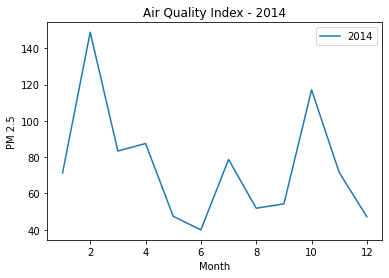

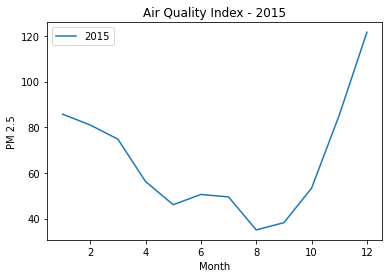

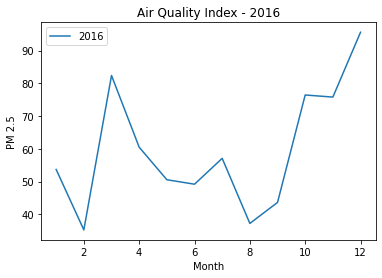

In [13]:
# Plot PM2.5 for a specific year (2016,2015 or 2014 anything)

def MonthWisePM2(df,year):
    df_monthwise = df.loc[str(year)].reset_index()
    df_monthwise = df_monthwise.groupby(['month'],as_index='False')['PM2.5'].mean()
    df_monthwise = df_monthwise.reset_index()
    plt.plot(df_monthwise['month'],df_monthwise['PM2.5'])
    plt.xlabel('Month')
    plt.ylabel("PM 2.5")
    plt.legend([str(year)])
    plt.title(f"Air Quality Index - {year}")
    plt.show()

MonthWisePM2(df,2014)
MonthWisePM2(df,2015)
MonthWisePM2(df,2016)

# We observe that the PM2.5 is higher around Jan, Feb and from October to December, every year. This indicates some kindof "seasonality"

array([<AxesSubplot:xlabel='year_month_day_hour'>,
       <AxesSubplot:xlabel='year_month_day_hour'>,
       <AxesSubplot:xlabel='year_month_day_hour'>,
       <AxesSubplot:xlabel='year_month_day_hour'>,
       <AxesSubplot:xlabel='year_month_day_hour'>], dtype=object)

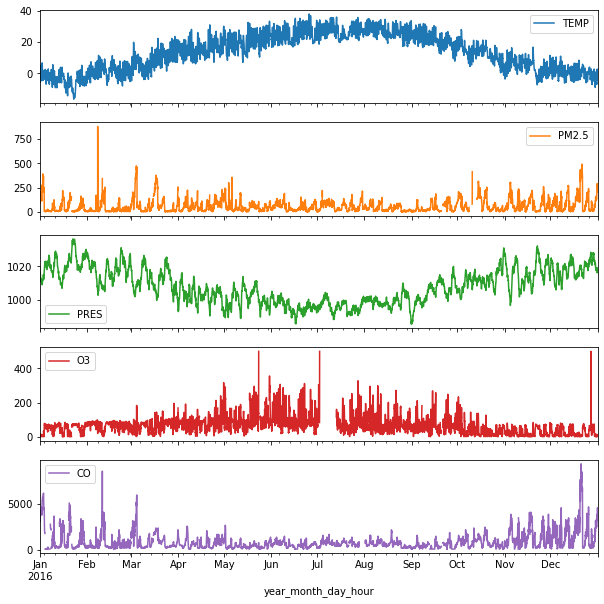

In [14]:
# Analysing Different features and PM2.5, and trying to find some pattern/behaviour

df_temp_pm2 = df.loc['2016']
df_temp_pm2 = df_temp_pm2[["TEMP","PM2.5","PRES","O3","CO"]]
df_temp_pm2.plot(subplots = True, figsize = (10,10))

# When the temperatures are lower (winter months), it seems like PM2.5 is on the higher side compared to the summer months

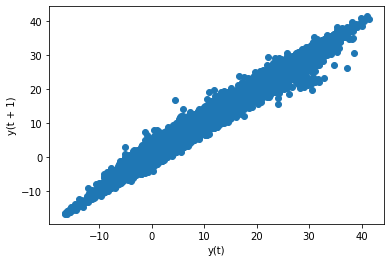

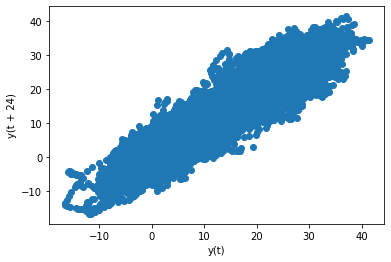

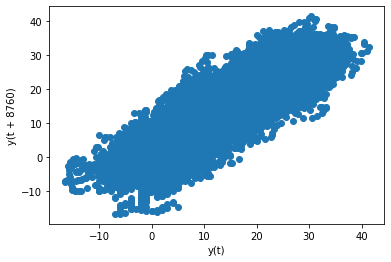

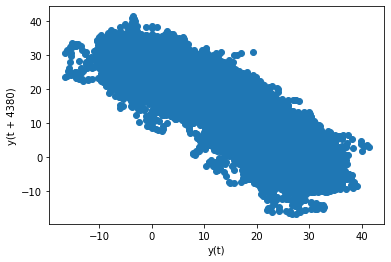

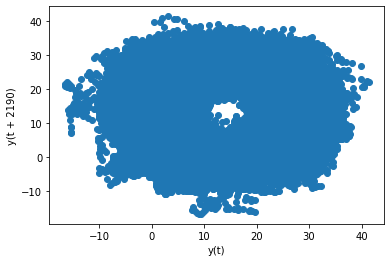

In [15]:
# Generating Lag Plots to identify auto-correlation patterns in TEMP feature (similar to scatter plot)
# Autocorrelation is a mathematical representation of the degree of similarity between a given time series and a lagged version of itself 
# Both X and Y axis is temperature values, but Y axis is temmperature after some lag (passed in lag parameter)

pd.plotting.lag_plot(df["TEMP"],lag = 1) #Plot of Temperature values at time T and (T+1). Here each time step indicates one hour
plt.show()
pd.plotting.lag_plot(df["TEMP"],lag = 24) #T and T+24 (indicating temperature a day later since 1 time step is 1 hour)
plt.show()
pd.plotting.lag_plot(df["TEMP"],lag = 8760) #T and T + 8760 (Temperature value a year later, 24*365=8760)
plt.show()
pd.plotting.lag_plot(df["TEMP"], lag = 4380) #T and T + 4380(Temperature value half a year later) Hence negative correlation since weather will be opposite
plt.show()
pd.plotting.lag_plot(df["TEMP"], lag = 2190)
plt.show()

            SO2       NO2        CO        O3     PM2.5
SO2    1.000000  0.634708  0.593634 -0.220343  0.510249
NO2    0.634708  1.000000  0.819197 -0.367161  0.765105
CO     0.593634  0.819197  1.000000 -0.323826  0.791282
O3    -0.220343 -0.367161 -0.323826  1.000000 -0.125668
PM2.5  0.510249  0.765105  0.791282 -0.125668  1.000000


<AxesSubplot:>

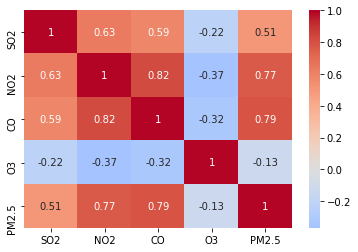

In [16]:
# Correlation matrix between different continuous variables in the dataset

df_2016 = df.loc["2016"]
corr_matrix = df_2016[["SO2","NO2","CO","O3","PM2.5"]].corr(method = "pearson")
print(corr_matrix)
sns.heatmap(corr_matrix, cmap = "coolwarm", vmax = 1.0, center = 0, annot= True)

           TEMP      PRES      DEWP      RAIN      WSPM     PM2.5
TEMP   1.000000 -0.848831  0.842540  0.050311 -0.051459 -0.044191
PRES  -0.848831  1.000000 -0.793259 -0.084408  0.165985 -0.086978
DEWP   0.842540 -0.793259  1.000000  0.114451 -0.353108  0.144014
RAIN   0.050311 -0.084408  0.114451  1.000000  0.002536 -0.034750
WSPM  -0.051459  0.165985 -0.353108  0.002536  1.000000 -0.282262
PM2.5 -0.044191 -0.086978  0.144014 -0.034750 -0.282262  1.000000


<AxesSubplot:>

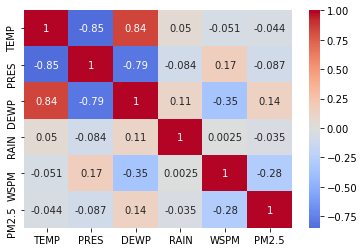

In [17]:
df_2016 = df.loc["2016"]
corr_matrix2 = df_2016[["TEMP","PRES","DEWP","RAIN","WSPM","PM2.5"]].corr(method = "pearson")
print(corr_matrix2)
sns.heatmap(corr_matrix2, cmap = "coolwarm", vmax = 1.0, center = 0, annot= True)

# Here we observe that even through PM2.5 and Temperature we thought had some kind of correlation(PM2.5 higher during winter) based on previous visualisations, the correlation value here is small.
# Therefore, not much correlation. But we this does not mean that PM2.5 has no relation with weather. Maybe its not very linearly related thats it.

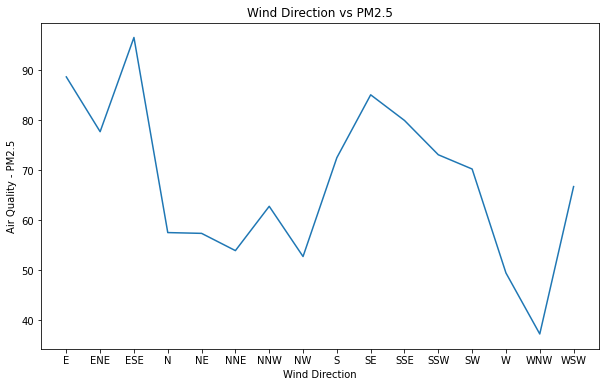

In [18]:
# Analysing pattern between Wind Direction and PM2.5, if any

df_wd = df.groupby("wd").agg({"PM2.5":"mean"}).reset_index()

plt.figure(figsize = (10,6))
plt.plot(df_wd["wd"],df_wd["PM2.5"])
plt.xlabel("Wind Direction")
plt.ylabel("Air Quality - PM2.5")
plt.title("Wind Direction vs PM2.5")
plt.show()

# As we observe, it seems like PM2.5 is higher for wind direction  East/s and South/s, compared to West and North.
# This knowledge may or may not help during modelling later.

### Handling Missing Data

In [30]:
# We cant do usual missing data handling techniques like dropping rows with missing data etc because the order is important and dropping rows will mess up the order
# We also cant use imputation techniques like global mean/median etc because time series has trends and seasonality( eg: sales higher on weekends compared to weekdays). Taking a mean would mean that we lose such information, and introduce incorrect information

print(df.isnull().any())
print("\n")
print(df.nunique())
print("\n")
print(df.isnull().sum())

No         False
year       False
month      False
day        False
hour       False
PM2.5       True
PM10        True
SO2         True
NO2         True
CO          True
O3          True
TEMP        True
PRES        True
DEWP        True
RAIN        True
wd          True
WSPM        True
station    False
dtype: bool


No         35064
year           5
month         12
day           31
hour          24
PM2.5        486
PM10         554
SO2          327
NO2          636
CO           103
O3           792
TEMP         998
PRES         593
DEWP         602
RAIN         116
wd            16
WSPM          95
station        1
dtype: int64


No            0
year          0
month         0
day           0
hour          0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64


In [33]:
#Based on EDA, we observed from the lag plots(auto-correlation) that we with a lag =1, the auto-correlation is pretty linear
#One option is therefore impute the missing values in TEMP from TEMP value from previous day, previous day or previous year

In [ ]:
# Other option is to do a rolling window imputation based on a window of "n" previous values. 
# One more option is to do a forward fill using fillna.